# MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


For easy to understand how this data set was built, I get an example image, which contains number 7, from mist.
1. Resize it from 28x28 to 10X10 and make diagram. Each pixel in image contains value from 0 to 255. The greater the number, the whiter the color. That is the way how people encode the image. [Link](https://www.scan2cad.com/tips/bitmap-vs-vector/) for further information.
2. Because each observation should be one line in dataset so we reshape 2-D array to 1-D array. Using 1-D array as feature vector and label it. In our case, it's 7.
3. Do it again with the other images from mist. We will have a table with feature vector and label. Take a close look at first and third observation. The pattern of them are much similar than second observation. Base on this thing, we hope that can build a model that classify a number using feature vector.

Let's do it.
![Imgur](https://i.imgur.com/wtFCKS3.jpg)

## TODO
1. Read dataset
    - Dataset is too large (42000 observation) for some computer. To make it easy to handle, we get 5000 sample from origin dataset
    - Split data set into train and test set
2. Visualization
    - Visualization helps you understand more about data set. Grab an observation and visualize it.
3. Modeling
    - We try with 2 tree base model:
        - Decision Tree
        - Random Forest
4. Evaluate model
    - Calculate accuracy, precision, recall, f1 score with each model.
    - Random Forest vs Decision Tree, which one is better.
5. Fine Tune
    - Random Forest has many hyper parameters that we have to choose, so which combination is bet fit with our data set? Using gridsearchCV to find it.

## 1. Read dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Import dataset
data = pd.read_csv("./data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
# For easy to handle, we use a small pice of dataset
# Ramdomly choose 5000 rows for now
# hint: dataframe.sample(5000)
data = data.sample(5000, random_state = 101)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 20209 to 14281
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB


In [4]:
# Let's take a look at first 5 rows ()
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7136,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22572,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```
![image](https://i.imgur.com/lFxwGOf.png=500x500)

In [5]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
data['label'].unique()


array([1, 3, 0, 9, 5, 6, 7, 2, 4, 8], dtype=int64)

In [6]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
X = data.drop(columns=['label']).values
y = data['label'].values

In [7]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## 2. Visualization

Label: 1


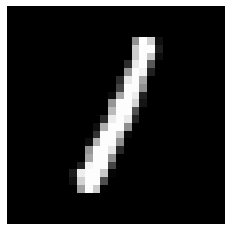

In [8]:
# Now convert some example of our data back to image
# Start with choosing a random integer number called 'index'
# Print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49
index = 36
print("Label: " + str(y_train[index]))
plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

## 3. Modeling

In [9]:
# Random Forest & Decision Tree
# Define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create randomforest model
rfc = RandomForestClassifier()

# Create Decision Tree model
dtc = DecisionTreeClassifier()

In [10]:
# Let's fit training data to Random Forest Classifier
rfc.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# Let's fit training data to Decision Tree Classifier
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 4. Evaluate model

In [12]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
rfc_predictions = rfc.predict(X_test)
accuracy_score(y_test, rfc_predictions)

0.8888

In [13]:
# Decision Tree model
dtc_predictions = dtc.predict(X_test)
accuracy_score(y_test, dtc_predictions)

0.7632

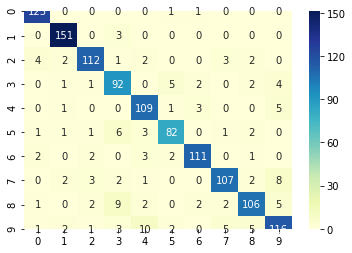

In [14]:
# Use heatmap() to visualize the confustion matrix
# Plot the heatmap for confusion matrix of Random Forest model
rfc_cfm = confusion_matrix(y_test, rfc_predictions)
sns.heatmap(rfc_cfm,cmap="YlGnBu", annot=True, fmt="d")

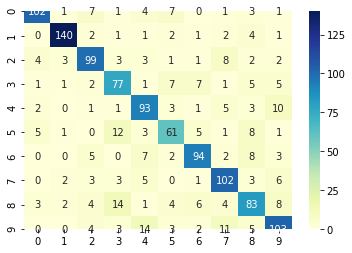

In [15]:
# And heatmap for confusion matrix of Decision Tree model
dtc_cfm = confusion_matrix(y_test, dtc_predictions)
sns.heatmap(dtc_cfm,cmap="YlGnBu", annot=True, fmt="d")

## 5. Fine Tune
[Further reading](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

[0.672, 0.8176, 0.8896, 0.9184, 0.9312, 0.9456, 0.9456, 0.9496]


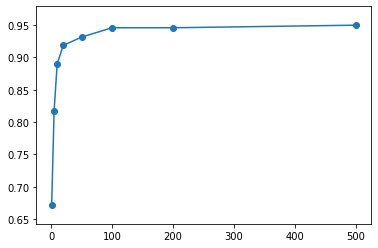

In [16]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(n, result)
plt.plot(n, result)

print(result)

### Hyperparameter Random Forest
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)


- np.**linspace**(start = 200, stop = 2000, num = 10)]

### Gridsearch CV

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# Define input
param_grid = {
    "n_estimators":[1, 5, 10, 20, 50, 100, 200, 500],
     "max_depth": [5, 10, 50, 100]
}

# Create gridsearch cv model
gridcv = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)

# Train model
gridcv.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [19]:
gridcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
gridcv.best_score_

0.9277333333333333

In [21]:
gridcv.best_params_

{'max_depth': 100, 'n_estimators': 500}

In [22]:
pd.DataFrame(gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033312,0.004781,0.006662,0.000943,5,1,"{'max_depth': 5, 'n_estimators': 1}",0.545527,0.570743,0.543705,0.553333,0.012341,32
1,0.069293,0.007755,0.008995,0.002159,5,5,"{'max_depth': 5, 'n_estimators': 5}",0.713259,0.740208,0.754611,0.736000,0.017139,28
2,0.109943,0.009885,0.009994,0.001413,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.784345,0.791367,0.797915,0.791200,0.005540,27
3,0.193889,0.014299,0.014660,0.001247,5,20,"{'max_depth': 5, 'n_estimators': 20}",0.826677,0.834532,0.840417,0.833867,0.005628,23
4,0.461075,0.040483,0.021654,0.000929,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.831470,0.854516,0.846832,0.844267,0.009587,22
5,0.949122,0.083559,0.048966,0.010614,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.833866,0.852918,0.854852,0.847200,0.009473,21
6,1.783708,0.040470,0.068960,0.000824,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.845048,0.856115,0.864475,0.855200,0.007956,18
7,4.373643,0.367286,0.187664,0.020828,5,500,"{'max_depth': 5, 'n_estimators': 500}",0.847444,0.853717,0.863673,0.854933,0.006680,19
8,0.035979,0.002159,0.007003,0.000808,10,1,"{'max_depth': 10, 'n_estimators': 1}",0.644569,0.663469,0.633520,0.647200,0.012363,30
9,0.126922,0.010617,0.011660,0.002054,10,5,"{'max_depth': 10, 'n_estimators': 5}",0.804313,0.798561,0.813152,0.805333,0.005998,24


In [23]:
# Define input
param_grid_2 = {
    "n_estimators":[1, 5, 10, 20, 50, 100, 200, 500]
}

# Create gridsearch cv model
gridcv_2 = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_2)

# Train model
gridcv_2.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [24]:
gridcv_2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
gridcv_2.best_score_

0.9274666666666667

In [26]:
gridcv_2.best_params_

{'n_estimators': 500}

### RandomizedSearch CV


In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
# Define input
param_random = {
    "n_estimators":[1, 5, 10, 20, 50, 100, 200, 500]
}
model = RandomForestClassifier()
# Create random cv model
randcv = RandomizedSearchCV(estimator = model, param_distributions = param_random)

# Train model
randcv.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [29]:
randcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
randcv.best_score_

0.9269333333333334

In [31]:
randcv.best_params_

{'n_estimators': 500}

In [32]:
from sklearn import tree

In [ ]:
#Plot the tree 

[Text(196.09828326180258, 211.4, 'X[350] <= 121.5\ngini = 0.9\nsamples = 3750\nvalue = [351, 392, 378, 393, 366, 336, 371, 395, 371, 397]'),
 Text(118.12222371244634, 199.32, 'X[596] <= 5.5\ngini = 0.879\nsamples = 2414\nvalue = [316, 30, 299, 76, 339, 189, 292, 368, 182, 323]'),
 Text(69.97202253218884, 187.24, 'X[430] <= 0.5\ngini = 0.833\nsamples = 1546\nvalue = [41, 15, 70, 35, 322, 83, 234, 347, 85, 314]'),
 Text(38.167918454935624, 175.16, 'X[405] <= 20.0\ngini = 0.696\nsamples = 613\nvalue = [9, 15, 33, 22, 33, 26, 35, 319, 52, 69]'),
 Text(24.048283261802574, 163.07999999999998, 'X[484] <= 104.0\ngini = 0.496\nsamples = 447\nvalue = [7, 5, 24, 7, 22, 5, 23, 312, 1, 41]'),
 Text(16.96351931330472, 151.0, 'X[151] <= 5.5\ngini = 0.277\nsamples = 361\nvalue = [2, 4, 21, 7, 5, 4, 3, 306, 1, 8]'),
 Text(13.490987124463519, 138.92000000000002, 'X[158] <= 4.5\ngini = 0.151\nsamples = 329\nvalue = [2, 4, 2, 3, 3, 3, 1, 303, 1, 7]'),
 Text(10.377682403433477, 126.84, 'X[457] <= 224.5\ngi

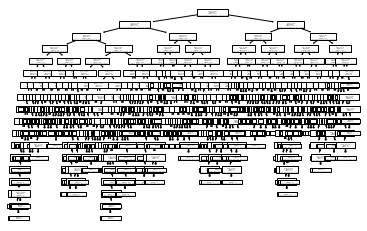

In [33]:
tree.plot_tree(dtc) 